In [7]:
from pathlib import Path
from PIL import Image

import cv2
import numpy as np



(1080, 1920, 3)


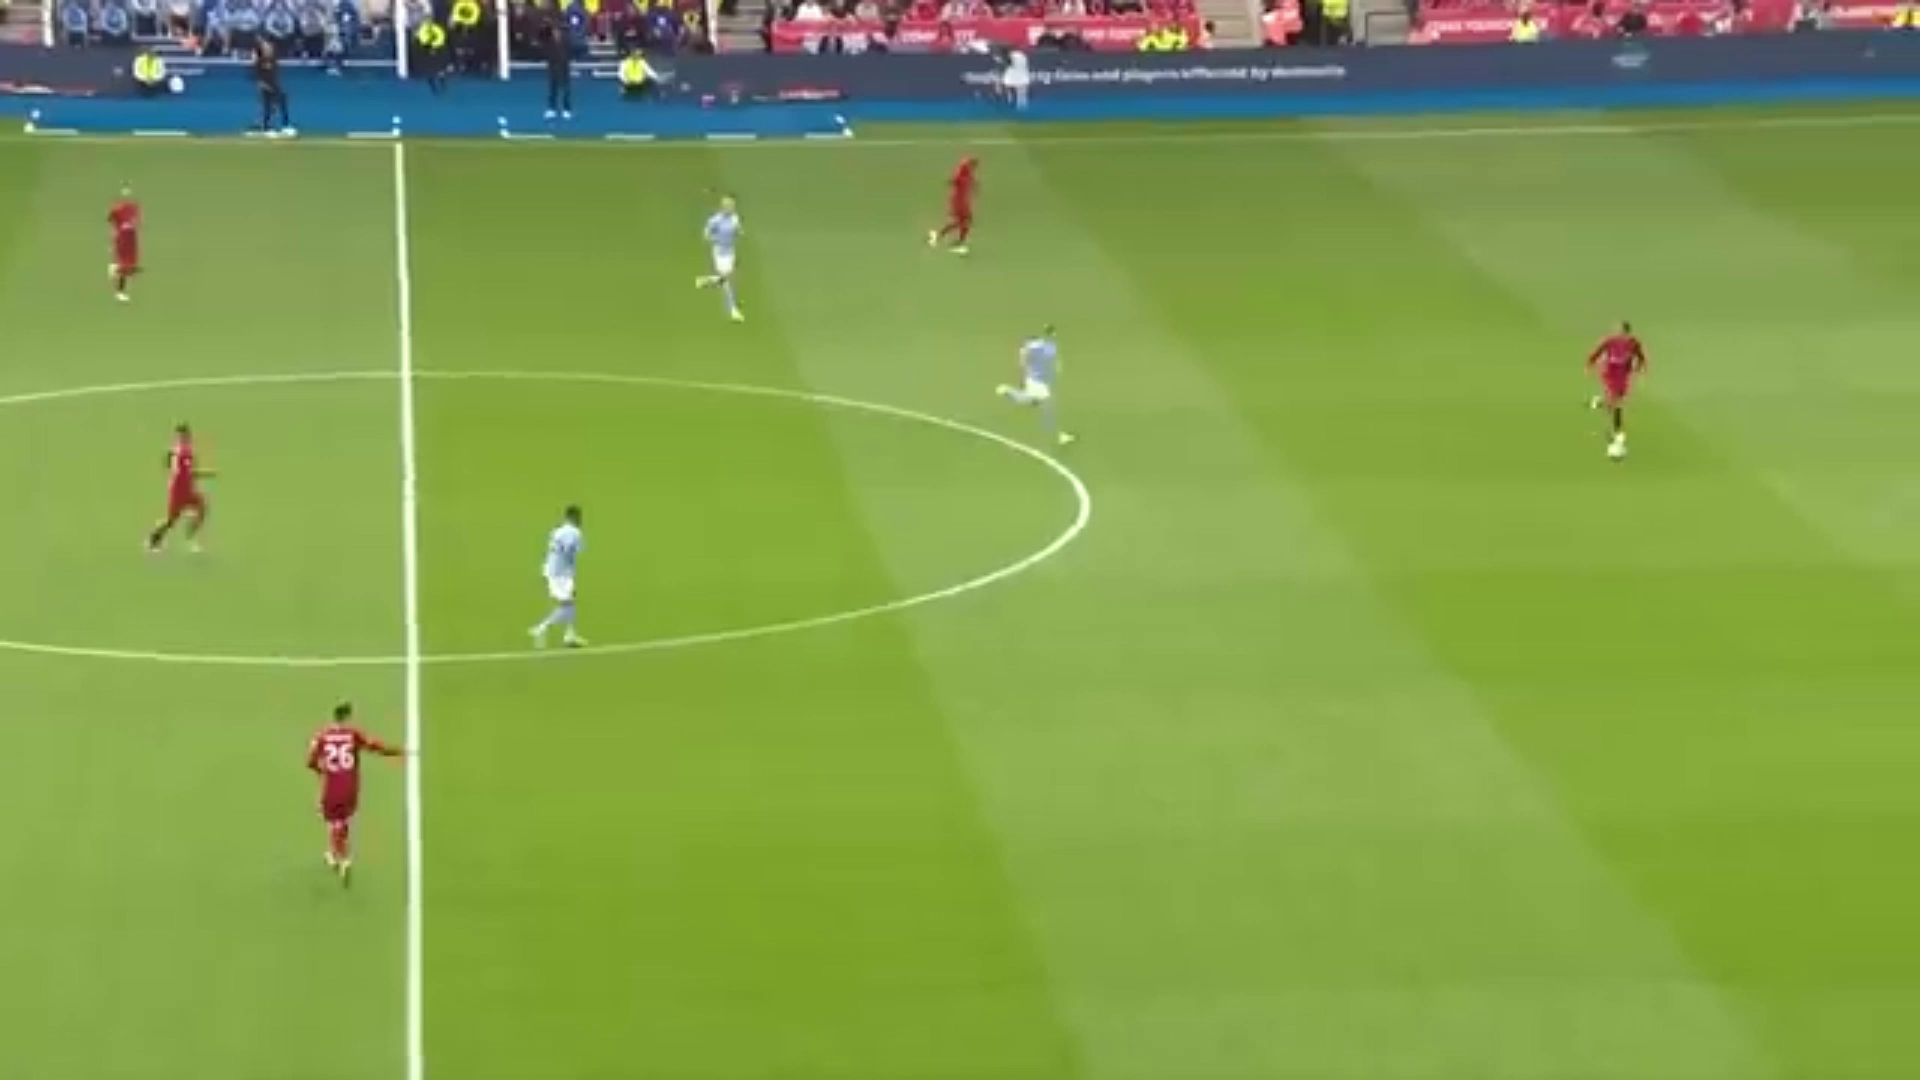

In [8]:

video_path = Path(r"C:\Users\karin\OneDrive\Desktop\NEA\Data\CutLiverpoolNorwichClip - Made with Clipchamp_1729274367174.mp4")  # path to saved video
if not video_path.exists():  # throw error if can't find file
    raise FileNotFoundError(f"Video file not found at {video_path}")
cap = cv2.VideoCapture(str(video_path))  # read in video file
if not cap.isOpened():  # throw error if cv2 can't open the file
    raise Exception(f"cv2 was not able to load the video file")
ret, frame_BGR = cap.read()  # grab first frame
frame = cv2.cvtColor(frame_BGR, cv2.COLOR_BGR2RGB)  # convert BGR to RGB
print(frame.shape)  # print frame shape (numpy array)
image = Image.fromarray(frame)  # convert frame as numpy array to PIL image
display(image)  # display the image below



In [9]:
cap.get(cv2.CAP_PROP_FRAME_COUNT)

8992.0

In [10]:
new_height, new_width = frame.shape[0] // 2, frame.shape[1] // 2  # get new width and height

# Create a new video file via cv2.VideoWriter
fourcc = cv2.VideoWriter_fourcc(*"mp4v")  # codec for mp4 files
out_path = Path(r"C:\Users\karin\OneDrive\Desktop\NEA\Data\CutClipDownsampled.mp4")  # path to save new video
out = cv2.VideoWriter(str(out_path), fourcc, 30, (new_width, new_height))  # create new video file object

# For each frame in the original video, resize and write to new video file.
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:  # if error reading frame, break.
        break
    # Rezise frame; todo: what does interpolation do?
    resized_frame = cv2.resize(frame, (new_width, new_height), interpolation=cv2.INTER_AREA)
    out.write(resized_frame)  # write frame to new video file

cap.release()  # release the original video file
out.release()  # release the new (downsampled) video file

In [14]:
"""Save every 10th frame as a png file: manually create `out_path` directory first!"""

# Make sure to create the directory manually first!
out_path = Path(r"C:\Users\karin\OneDrive\Desktop\NEA\Data\combinedFrames")  # directory in which to save frames
video_path = Path(r"C:\Users\karin\OneDrive\Desktop\NEA\Data\CutClipDownsampled.mp4")  # get path to downsampled video
if not video_path.exists():  # throw error if path not found
    raise FileNotFoundError(f"Video file not found at {video_path}")
cap = cv2.VideoCapture(str(video_path))  # read in video file

frame_number = 0  # current frame number
frames_to_take = (0, 8990)  # min, max of frames to take, depending on annotator
# Loop through frames in video, if within frames to take, save every 10th frame as a png file.
while cap.isOpened():
    ret, frame_BGR = cap.read()  # grab frame
    if not ret:  # if error reading frame, break loop
        break
    if (frame_number <= frames_to_take[0]):  # skip frame unless within range to take
        frame_number += 1  # add 1 to frame number counter
        continue
    elif (frame_number > frames_to_take[1]):  # after last frame to take, break loop
        break
    if frame_number % 5 == 0:  # only save every 10th frame
        frame = cv2.cvtColor(frame_BGR, cv2.COLOR_BGR2RGB)  # convert BGR to RGB
        image = Image.fromarray(frame)  # convert numpy array to PIL Image
        image.save((out_path / f"frame_{frame_number}.png"))  # save image as png file
    frame_number += 1  # add 1 to frame number counter

cap.release()  # release the video file